In [ ]:
# multivariate linear regression 

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

   Ones     rsize  rooms     price
0     1  0.345284   0.50  0.433962
1     1  0.206288   0.50  0.301887
2     1  0.426917   0.50  0.375660
3     1  0.155543   0.25  0.117170
4     1  0.592388   0.75  0.698113


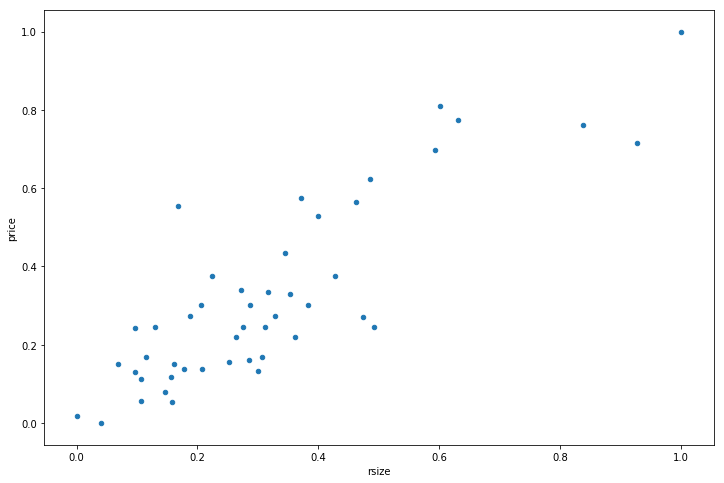

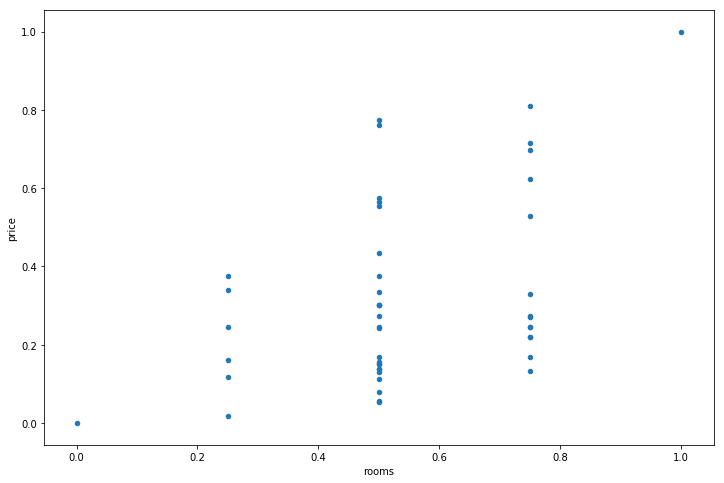

In [324]:
#location of test data
path="/home/meenusai/sem2-1/ml/ex1data2.txt"
df = pd.read_csv(path,header=None,names=['df_size','df_room','df_price'])
#applying Normalisation to dataset
datanorm=data.apply(lambda data: (data - np.min(data)) / (np.max(data) - np.min(data)))
#Plotting normalised dataset
datanorm.plot(kind='scatter', x='df_size', y='df_price', figsize=(12,8))
datanorm.plot(kind='scatter', x='df_room', y='df_price', figsize=(12,8))

In [ ]:
datanorm.insert(0, 'Ones', 1)

In [333]:
#separating features and outcomes
cols = df.shape[1]
X=df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [334]:
#Convering Vectors to Matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [335]:
#Cost function defined
def computeCost(X, y, theta):
    cost = np.sum(np.power(((X * theta.T) - y), 2)) / (2 * len(X))
    return cost

In [336]:
#Gradient Descent funtion defined
#The function is implemented using 1 for loop
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X.T * (X @ theta.T - y))
        cost[i] = computeCost(X, y, theta)
    return theta,cost

In [337]:
#alpha and number of iterations
alpha = 0.01
iters = 100

In [349]:
#Computing Linear regresstion
g, cost = gradientDescent(X, y, theta, alpha, iters)
print (g)
Cost=computeCost(X,y,g)
print (Cost)

[[0.25930122 0.25930122 0.25930122]]
2.391742646335353


In [339]:
#creating x,y&z axis
x = np.linspace(df.rsize.min(), df.rsize.max())
y = np.linspace(df.rooms.min(), df.rooms.max())
z= np.linspace(df.price.min(), df.price.max())

Text(0.5,1,'Predicted Price vs. House Size& No of Rooms')

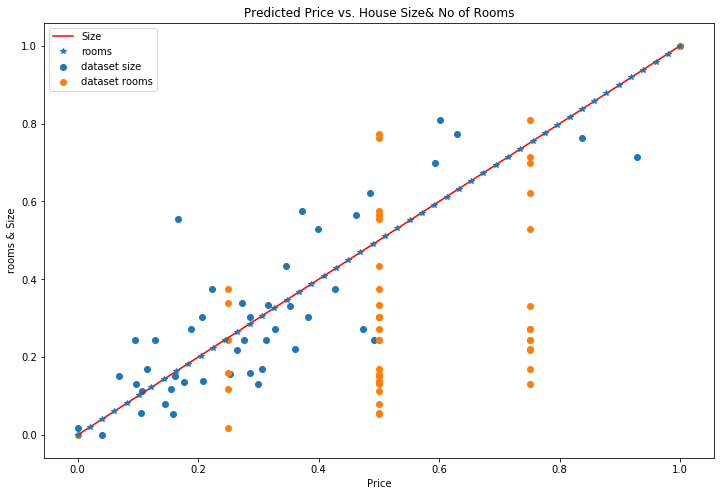

In [346]:
#Plotting Predicted Price vs. House Size& No of Rooms along with the original dataset(normalised)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, z, 'r', label='Size')
ax.plot(y, z,'*', label='rooms')
ax.scatter(df.df_size,df.df_price,label='dataset size')
ax.scatter(df.df_rooms,df.df_price,label='dataset rooms')
ax.legend(loc=2)
ax.set_ylabel('rooms & Size')
ax.set_xlabel('Price')
ax.set_title('Predicted Price vs. House Size& No of Rooms')

Text(0.5,1,'Error vs. Training Epoch')

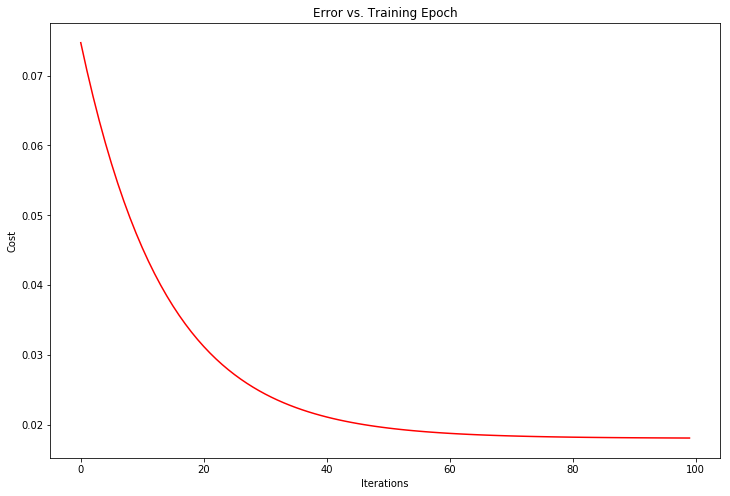

In [347]:
#Visualizing how error reduces as no of iteration increases
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')